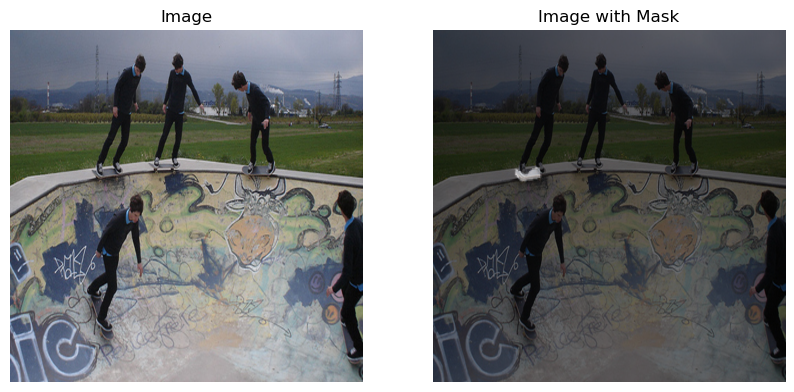

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import zoom

def visualize_npy_in_notebook(image_npy_path, mask_npy_path, vmin=0, vmax=1):    

    image = np.load(image_npy_path)
    mask = np.load(mask_npy_path)
    

    if image.shape[0] == 3:
        image = np.transpose(image, (1, 2, 0))  


    if mask.shape[0] == 1:
        mask = mask[0]  

    if mask.shape != (1024, 1024):
        mask = zoom(mask, (1024 / mask.shape[0], 1024 / mask.shape[1]), order=0)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, vmin=vmin, vmax=vmax)
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(image, vmin=vmin, vmax=vmax)
    plt.imshow(mask, cmap='gray', alpha=0.5)  
    plt.title('Image with Mask')
    plt.axis('off')
    
    plt.show()


image_npy_path = '/mnt/sda/minkyukim/sam_dataset/coco_npy_test_dataset_1024image/imgs/150649.npy' 
mask_npy_path = '/mnt/sda/minkyukim/sam_dataset/coco_npy_test_dataset_1024image/gts/150649_8.npy'   

visualize_npy_in_notebook(image_npy_path, mask_npy_path, vmin=0, vmax=1)



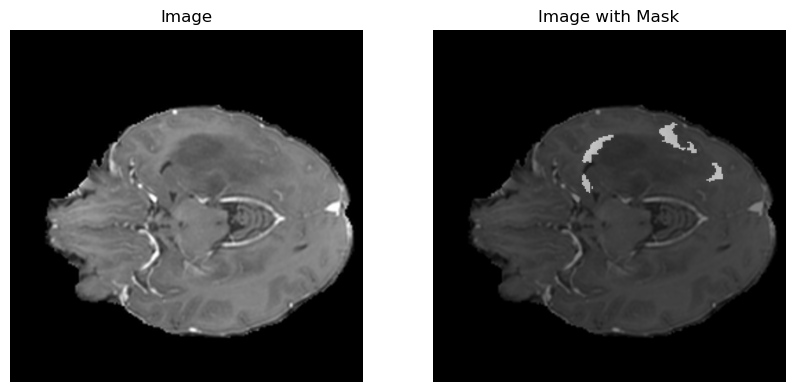

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import zoom

def visualize_npy_in_notebook(image_npy_path, mask_npy_path, vmin=0, vmax=1):    

    image = np.load(image_npy_path)
    mask = np.load(mask_npy_path)
    

    if image.shape[0] == 3:
        image = np.transpose(image, (1, 2, 0))  


    if mask.shape[0] == 1:
        mask = mask[0]  

    if mask.shape != (1024, 1024):
        mask = zoom(mask, (1024 / mask.shape[0], 1024 / mask.shape[1]), order=0)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, vmin=vmin, vmax=vmax)
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(image, vmin=vmin, vmax=vmax)
    plt.imshow(mask, cmap='gray', alpha=0.5)  
    plt.title('Image with Mask')
    plt.axis('off')
    
    plt.show()




image_npy_path = '/mnt/sda/minkyukim/sam_dataset/brats_npy_test_dataset_1024image/imgs/2048_T1ce.npy' 
mask_npy_path = '/mnt/sda/minkyukim/sam_dataset/brats_npy_test_dataset_1024image/gts/2048_T2_lbl2.npy'   

visualize_npy_in_notebook(image_npy_path, mask_npy_path, vmin=0, vmax=1)

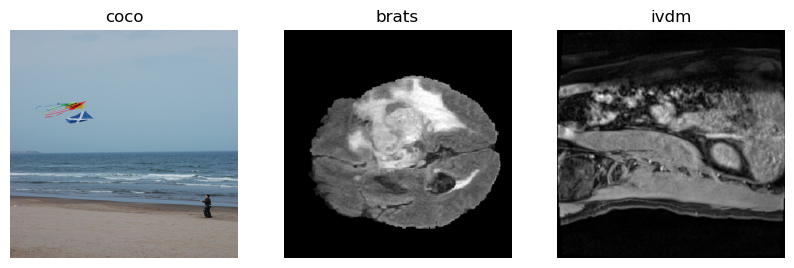

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

def visualize_npy_in_notebook(coco_image_npy_path, brats_image_npy_path, ivdm_image_npy_path, vmin=0, vmax=1):    

    image_1 = np.load(coco_image_npy_path)
    image_2 = np.load(brats_image_npy_path)
    image_3 = np.load(ivdm_image_npy_path)

    

    if image_1.shape[0] == 3:
        image_1 = np.transpose(image_1, (1, 2, 0))  
    if image_2.shape[0] == 3:
        image_2 = np.transpose(image_2, (1, 2, 0))  
    if image_3.shape[0] == 3:
        image_3 = np.transpose(image_3, (1, 2, 0))  


    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image_1, vmin=vmin, vmax=vmax)
    plt.title('coco')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(image_2, vmin=vmin, vmax=vmax)
    plt.title('brats')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(image_3, vmin=vmin, vmax=vmax)
    plt.title('ivdm')
    plt.axis('off')

    
    plt.show()




coco_image_npy_path = '/mnt/sda/minkyukim/sam_dataset/coco_npy_train_dataset_1024image/imgs/100001.npy' 
brats_image_npy_path = '/mnt/sda/minkyukim/sam_dataset/brats_npy_train_dataset_1024image/imgs/20_Flair.npy' 
ivdm_image_npy_path = '/mnt/sda/minkyukim/sam_dataset/ivdm_npy_train_dataset_1024image/imgs/01-2_wat.npy' 

visualize_npy_in_notebook(coco_image_npy_path, brats_image_npy_path,ivdm_image_npy_path, vmin=0, vmax=1)

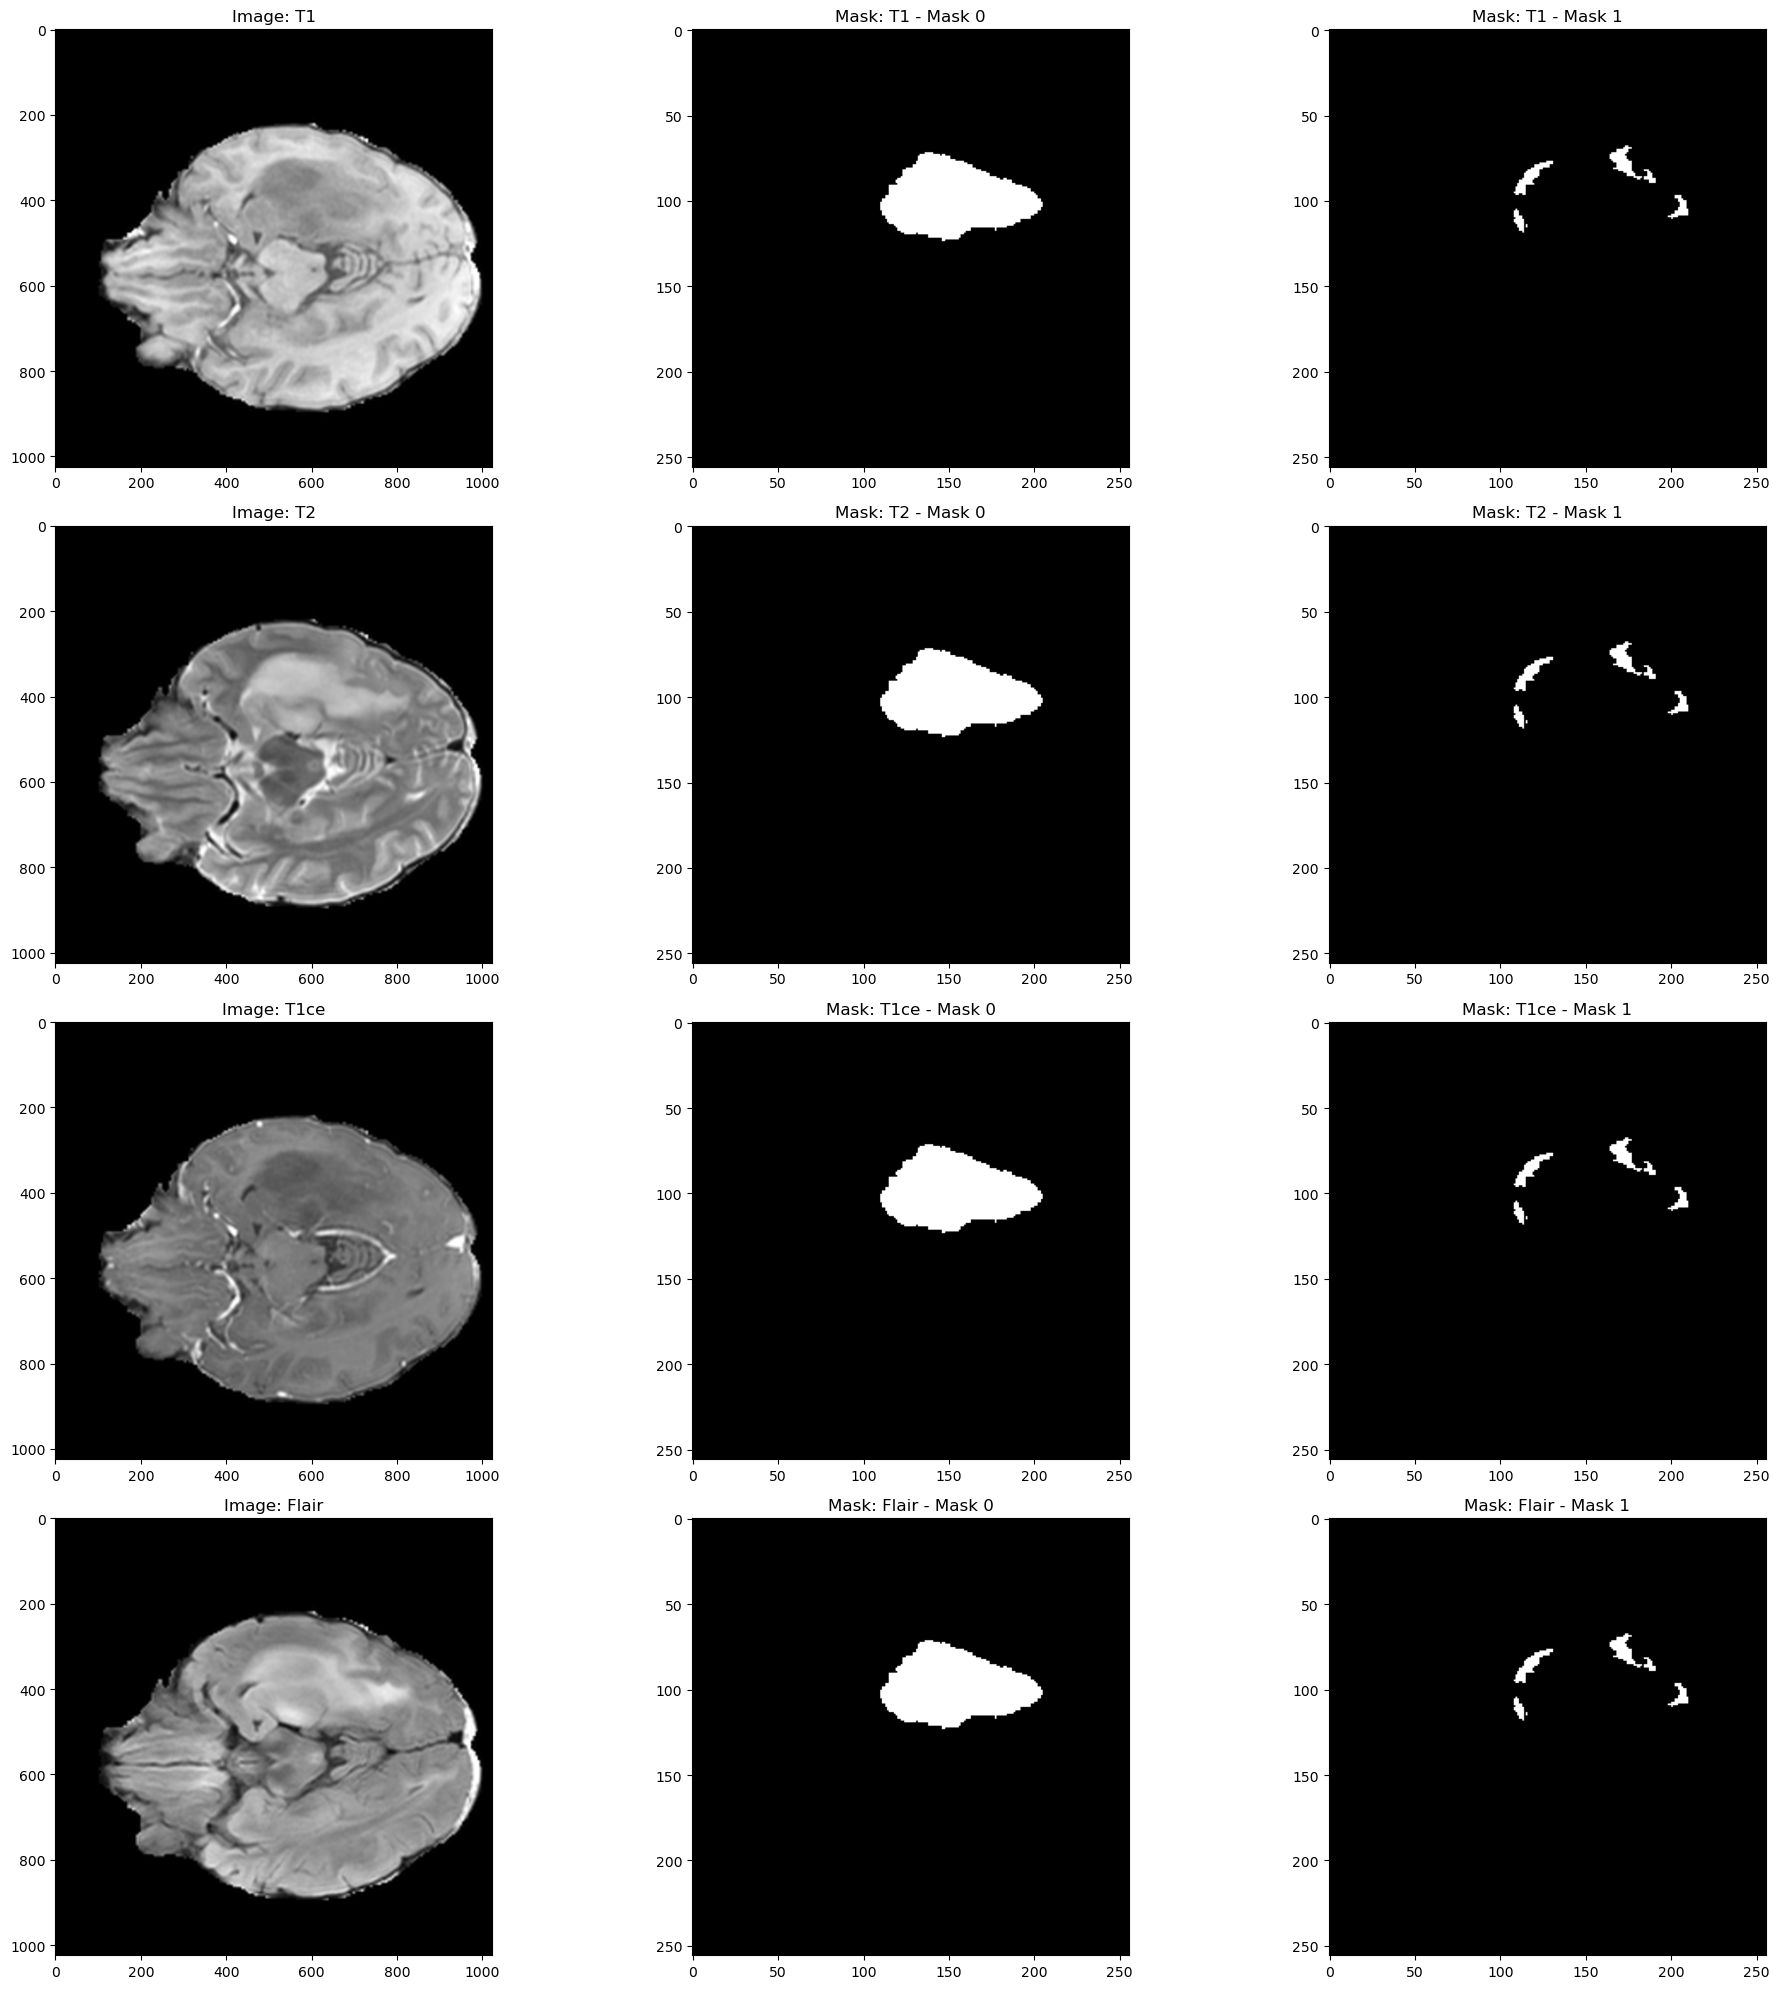

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
# 이미지 및 마스크 파일 경로 설정
img_path_template = '/mnt/sda/minkyukim/sam_dataset/brats_npy_test_dataset_1024image/imgs/{number}_{phase}.npy'
mask_path_template = '/mnt/sda/minkyukim/sam_dataset/brats_npy_test_dataset_1024image/gts/{number}_{phase}_lbl{number1}.npy'

# 클래스 리스트
phases = ['T1', 'T2', 'T1ce', 'Flair']

# 이미지 및 마스크 불러오기 함수
def load_images_and_masks(number):
    images = {}
    masks = {}

    # 이미지 불러오기
    for phase_name in phases:
        img_path = img_path_template.format(number=number, phase=phase_name)
        if os.path.exists(img_path):
            try:
                images[phase_name] = np.load(img_path)
                # 1차원 배열일 경우 reshape
                if images[phase_name].ndim == 1:
                    print(f"Warning: Reshaping 1D image {img_path} to 2D")
                    images[phase_name] = images[phase_name].reshape((int(np.sqrt(images[phase_name].size)), -1))
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                images[phase_name] = None
        else:
            print(f"Image file does not exist: {img_path}")
            images[phase_name] = None

    # 마스크 불러오기 (number1의 숫자는 가능한 파일 모두 불러옴)
    for phase_name in phases:
        mask_list = []
        number1 = 1
        while True:
            mask_path = mask_path_template.format(number=number, phase=phase_name, number1=number1)
            if os.path.exists(mask_path):
                try:
                    mask = np.load(mask_path)
                    mask_list.append(mask)
                    number1 += 1
                except Exception as e:
                    print(f"Error loading mask {mask_path}: {e}")
                    break
            else:
                if number1 == 0:
                    print(f"No masks found for {phase_name} at {mask_path}")
                break
        masks[phase_name] = mask_list

    return images, masks

# 이미지 및 마스크 시각화 함수
def visualize_images_and_masks(number):
    images, masks = load_images_and_masks(number)

    # 서브플롯 배열 설정
    max_masks = max(len(masks[phase_name]) for phase_name in phases)
    fig, axs = plt.subplots(len(phases), 1 + max_masks, figsize=(20, 5 * len(phases)))

    # axs가 1차원일 경우 처리
    if len(phases) == 1:
        axs = [axs]

    for i, phase_name in enumerate(phases):
        if images[phase_name] is not None:
            axs[i, 0].imshow(images[phase_name], cmap='gray')
            axs[i, 0].set_title(f'Image: {phase_name}')
        else:
            axs[i, 0].axis('off')
            axs[i, 0].set_title(f'Missing Image: {phase_name}')
        
        for j, mask in enumerate(masks[phase_name]):
            axs[i, j + 1].imshow(mask, cmap='gray')
            axs[i, j + 1].set_title(f'Mask: {phase_name} - Mask {j}')
            
        # 마스크가 적은 경우 나머지 공간에 빈 플롯 설정
        for j in range(len(masks[phase_name]), max_masks):
            axs[i, j + 1].axis('off')

    plt.tight_layout()
    plt.show()

# 사용 예시: number를 지정하여 시각화
number = 2048  # 원하는 number로 지정
visualize_images_and_masks(number)


